In [1]:
# Decision boundary
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors


In [7]:
from matplotlib.colors import ListedColormap

def knn_comparison(data, n_neighbors = 15):  #data,nearest_neighbors # this function finds k-NN and plots the data
    x = data[:, :2]  # this gives all the datapoints with first two columns(0,1)   #x,y -axis
    y = data[:,2]   # class labels [it contains only 2nd column]             # 2nd column is for class-label
    
    #grid cell size 
    h = .02  # grid_width = 0.02
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    
    # the core classifier:k_NN
    clf = neighbors.KNeighborsClassifier(n_neighbors)  # k_nn classifier
    clf.fit(x,y)  # fit the k-nn clasiffier with elements and class_label
    
    x_min , x_max = x[:,0].min()-1 , x[:,0].max()+1  # x - axis ranges from 3.9 to 8.9
    y_min , y_max = x[:,1].min()-1 , x[:,1].max()+1  # y - axis ranges from 1 to 4.8 
    # becoz here we have to create the mesh grid to fit our plots
    
    # we create a mesh grid (x_min,y_min) to (x_max ,y_max) with 0.02 grid spaces
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # we predict the value (either 0 or 1) of each element or data point in the grid  # predict positive or negative
    
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # xx.ravel() will give a flatten array
    # np.c_ : Translates slice objects to concatenation along the second axis.
    # > np.c_[np.array([1,2,3]), np.array([4,5,6])]
    # > array([[1, 4],
    #          [2, 5],
    #          [3, 6]])   
    
    # convert the out back to the xx shape (we need it to plot the decission boundry)
    z = z.reshape(xx.shape)
    
    # pcolormesh will plot the (xx,yy) grid with colors according to the values of Z
    # it looks like decision boundry
    plt.figure()
    plt.pcolormesh(xx, yy, z, cmap=cmap_light)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)# scatter plot of with given points
    
    #defining scale on both axises
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
   
    # set the title
    plt.title('K value = '+str(n_neighbors))
    

    plt.show()
    
    
    

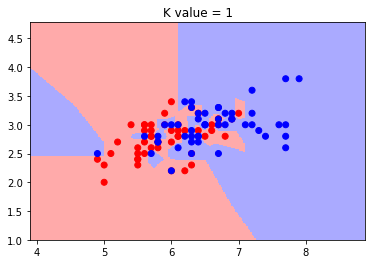

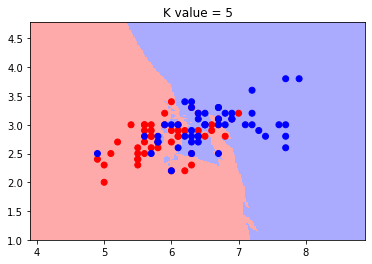

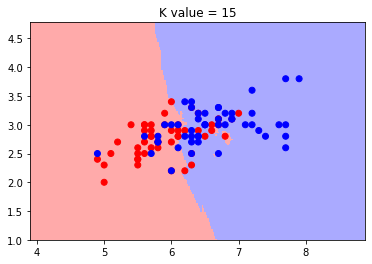

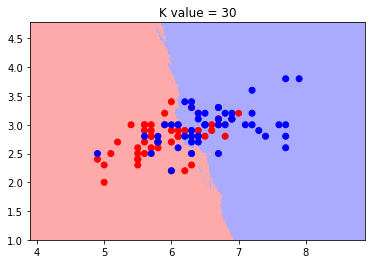

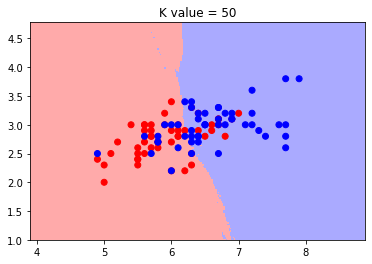

In [8]:
data = np.genfromtxt('./demo_data-20200421T122322Z-001/demo_data/6.overlap.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data,15)
knn_comparison(data, 30)
knn_comparison(data, 50)

## Cross Validation

In [9]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
# =============================================================================================

In [16]:
# Part I
# ============================== data preprocessing ===========================================

# define column_names
names = ['x','y','class']

# loading training dataset

df = pd.read_csv('./demo_data-20200421T122322Z-001/demo_data/3.concertriccir2.csv',header = None,names = names)
print(df.head())

          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


In [18]:

# creating design matrix X and target vector Y
x = np.array(df.iloc[:, 0:2]) # end index is exclusive  # x1,x2,.........x100  # datapoints  
y = np.array(df['class']) # showing you two ways of indexing a pandas df   # classes # either 0 or 1


## Simple Cross Validation

In [21]:
# split the data set into train and test
x_1, x_test,y_1,y_test = model_selection.train_test_split(x,y,test_size = 0.3,random_state =0)
#x_1 means x_train = 70 percent of data and corresponding y_train[class_labels:0 or 1] and x_test = 30 percent of data
# breakup data so that test_data = 30 percent and train_data = 70 percent

# split the train data set into cross validation train and cross validation test
x_train, x_cv, y_train, y_cv = model_selection.train_test_split(x_1,y_1,test_size=0.3)

# now im again splittig train and cv from the training dataset
# now test_data x_test= 30 percent ; cross_validation x_cv= 30 percent from the 70 percent = 21 percent
# train_data x_train= 40 percent from the 70 percent = 49 percent

for i in range(1,30,2):  # only odd numbers
    #instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # fitting the model on  train
    knn.fit(x_train, y_train)
    
    # predicting the response on the cv_train
    pred = knn.predict(x_cv)
    
    # evaluate CV accuracy
    acc = accuracy_score(y_cv,pred,normalize=True) * float(100)
    # comparing my y_cv with the predicted values for accuracy_score
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))

knn = KNeighborsClassifier(1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
acc = accuracy_score(y_test,pred,normalize=True) * float(100)
print('\nCV Test accuracy for k = %d is %d%%' % (i, acc))



CV accuracy for k = 1 is 87%

CV accuracy for k = 3 is 88%

CV accuracy for k = 5 is 91%

CV accuracy for k = 7 is 87%

CV accuracy for k = 9 is 83%

CV accuracy for k = 11 is 84%

CV accuracy for k = 13 is 82%

CV accuracy for k = 15 is 79%

CV accuracy for k = 17 is 80%

CV accuracy for k = 19 is 77%

CV accuracy for k = 21 is 71%

CV accuracy for k = 23 is 71%

CV accuracy for k = 25 is 72%

CV accuracy for k = 27 is 69%

CV accuracy for k = 29 is 69%

CV Test accuracy for k = 29 is 91%


## 10 fold cross Validation

[0.8974615384615385, 0.8971410256410257, 0.885602564102564, 0.8562948717948717, 0.8197692307692307, 0.8279487179487178, 0.8120897435897436, 0.8114358974358975, 0.7915769230769231, 0.7829230769230768, 0.7508846153846154, 0.7427179487179487, 0.7308589743589743, 0.7225256410256411, 0.702025641025641, 0.6981794871794873, 0.6900000000000001, 0.6784871794871796, 0.6538076923076923, 0.6456410256410258, 0.6417948717948719, 0.6172820512820513, 0.6009358974358975, 0.5967692307692307, 0.5804358974358974]

The optimal number of neighbors is 1.


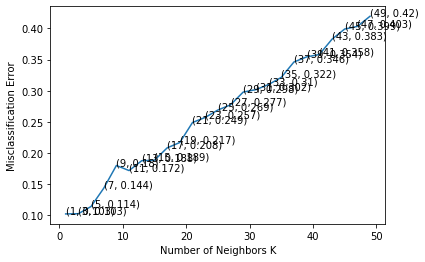

the misclassification error for each k value is :  [0.103 0.103 0.114 0.144 0.18  0.172 0.188 0.189 0.208 0.217 0.249 0.257
 0.269 0.277 0.298 0.302 0.31  0.322 0.346 0.354 0.358 0.383 0.399 0.403
 0.42 ]


In [32]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x:x % 2!=0, myList))
# empty list that will hold cv scores
cv_scores = []

# perfom 10_fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
print(cv_scores)   
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
best_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % best_k)

plt.plot(neighbors,MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))


In [33]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k

knn_best = KNeighborsClassifier(n_neighbors=best_k)

# fitting the model
knn_best.fit(x_train,y_train)

# predict the responde
pred = knn_best.predict(x_test)

# evaluate accuracy
acc = accuracy_score(y_test,pred,normalize=True)*100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (best_k, acc))


The accuracy of the knn classifier for k = 1 is 91.333333%
